In [3]:
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.metrics import confusion_matrix, log_loss
import matplotlib.pyplot as plt
import itertools
import numpy as np
import os
import random
from shutil import copyfile

In [2]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)
tf.config.list_physical_devices('GPU')
print(device_lib.list_local_devices())
print(tf. __version__) 

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 162292076473181741
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 10067378176
locality {
  bus_id: 1
  links {
  }
}
incarnation: 1570472876514648103
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:13:00.0, compute capability: 8.6"
xla_global_id: 416903419
]
2.10.1


In [ ]:
# Get all the paths
data_dir_list = os.listdir('../data')
print(data_dir_list)
path, dirs, files = next(os.walk("../data"))
file_count = len(files)
# print(file_count)

## Creating Directories

In [ ]:
# Make new base directory
original_dataset_dir = '../data'
base_dir = '../data/model/'
os.mkdir(base_dir)

In [ ]:
#create two folders (train and validation)
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

In [ ]:
#Under train folder create nine folders 

train_ajwa_dir = os.path.join(train_dir, 'ajwa')
os.mkdir(train_ajwa_dir)

train_galaxy_dir = os.path.join(train_dir, 'galaxy')
os.mkdir(train_galaxy_dir)

train_mejdool_dir = os.path.join(train_dir, 'medjool')
os.mkdir(train_mejdool_dir)

train_meneifi_dir = os.path.join(train_dir, 'meneifi')
os.mkdir(train_meneifi_dir)

train_nabatAli_dir = os.path.join(train_dir, 'nabtatAli')
os.mkdir(train_nabatAli_dir)

train_rutab_dir = os.path.join(train_dir, 'rutab')
os.mkdir(train_rutab_dir)

train_shaishe_dir = os.path.join(train_dir, 'shaishe')
os.mkdir(train_shaishe_dir)

train_sokari_dir = os.path.join(train_dir, 'sokari')
os.mkdir(train_sokari_dir)

train_sugaey_dir = os.path.join(train_dir, 'sugaey')
os.mkdir(train_sugaey_dir)


In [ ]:
#Under validation folder create nine folders

validation_ajwa_dir = os.path.join(validation_dir, 'ajwa')
os.mkdir(validation_ajwa_dir)

validation_galaxy_dir = os.path.join(validation_dir, 'galaxy')
os.mkdir(validation_galaxy_dir)

validation_mejdool_dir = os.path.join(validation_dir, 'medjool')
os.mkdir(validation_mejdool_dir)

validation_meneifi_dir = os.path.join(validation_dir, 'meneifi')
os.mkdir(validation_meneifi_dir)

validation_nabatAli_dir = os.path.join(validation_dir, 'nabtatAli')
os.mkdir(validation_nabatAli_dir)

validation_rutab_dir = os.path.join(validation_dir, 'rutab')
os.mkdir(validation_rutab_dir)

validation_shaishe_dir = os.path.join(validation_dir, 'shaishe')
os.mkdir(validation_shaishe_dir)

validation_sokari_dir = os.path.join(validation_dir, 'sokari')
os.mkdir(validation_sokari_dir)

validation_sugaey_dir = os.path.join(validation_dir, 'sugaey')
os.mkdir(validation_sugaey_dir)


## Splitting the Data

In [ ]:
def split_data(SOURCE, TRAINING, VALIDATION, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    valid_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    valid_set = shuffled_set[training_length:]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in valid_set:
        this_file = SOURCE + filename
        destination = VALIDATION + filename
        copyfile(this_file, destination)

In [ ]:
ajwa_SOURCE_DIR = '../data/ajwa/'
TRAINING_ajwa_DIR = '../data/model/train/ajwa/'
VALID_ajwa_DIR = '../data/model/validation/ajwa/'

galaxy_SOURCE_DIR = '../data/galaxy/'
TRAINING_galaxy_DIR = '../data/model/train/galaxy/'
VALID_galaxy_DIR = '../data/model/validation/galaxy/'

medjool_SOURCE_DIR = '../data/medjool/'
TRAINING_medjool_DIR = '../data/model/train/medjool/'
VALID_medjool_DIR = '../data/model/validation/medjool/'

meneifi_SOURCE_DIR = '../data/meneifi/'
TRAINING_meneifi_DIR = '../data/model/train/meneifi/'
VALID_meneifi_DIR = '../data/model/validation/meneifi/'

nabtatAli_SOURCE_DIR = '../data/nabtatAli/'
TRAINING_nabtatAli_DIR = '../data/model/train/nabtatAli/'
VALID_nabtatAli_DIR = '../data/model/validation/nabtatAli/'

rutab_SOURCE_DIR = '../data/rutab/'
TRAINING_rutab_DIR = '../data/model/train/rutab/'
VALID_rutab_DIR = '../data/model/validation/rutab/'

shaishe_SOURCE_DIR = '../data/shaishe/'
TRAINING_shaishe_DIR = '../data/model/train/shaishe/'
VALID_shaishe_DIR = '../data/model/validation/shaishe/'

sokari_SOURCE_DIR = '../data/sokari/'
TRAINING_sokari_DIR = '../data/model/train/sokari/'
VALID_sokari_DIR = '../data/model/validation/sokari/'

sugaey_SOURCE_DIR = '../data/sugaey/'
TRAINING_sugaey_DIR = '../data/model/train/sugaey/'
VALID_sugaey_DIR = '../data/model/validation/sugaey/'


In [ ]:


split_size = .80

split_data(ajwa_SOURCE_DIR, TRAINING_ajwa_DIR, VALID_ajwa_DIR, split_size)
split_data(galaxy_SOURCE_DIR, TRAINING_galaxy_DIR, VALID_galaxy_DIR, split_size)
split_data(medjool_SOURCE_DIR, TRAINING_medjool_DIR, VALID_medjool_DIR, split_size)
split_data(meneifi_SOURCE_DIR, TRAINING_meneifi_DIR, VALID_meneifi_DIR, split_size)
split_data(nabtatAli_SOURCE_DIR, TRAINING_nabtatAli_DIR, VALID_nabtatAli_DIR, split_size)
split_data(rutab_SOURCE_DIR, TRAINING_rutab_DIR, VALID_rutab_DIR, split_size)
split_data(shaishe_SOURCE_DIR, TRAINING_shaishe_DIR, VALID_shaishe_DIR, split_size)
split_data(sokari_SOURCE_DIR, TRAINING_sokari_DIR, VALID_sokari_DIR, split_size)
split_data(sugaey_SOURCE_DIR, TRAINING_sugaey_DIR, VALID_sugaey_DIR, split_size)



## Explore

## Model

In [3]:
img_width=256; img_height=256
batch_size=16

In [4]:
TRAINING_DIR = '../data/model/train/'

train_datagen = ImageDataGenerator(rescale = 1/255.0,
                                   rotation_range=30,
                                   zoom_range=0.4,
                                   horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    target_size=(img_height, img_width))

Found 1323 images belonging to 9 classes.


In [5]:

VALIDATION_DIR = '../data/model/validation/'

validation_datagen = ImageDataGenerator(rescale = 1/255.0)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=batch_size,
                                                              class_mode='categorical',
                                                              target_size=(img_height, img_width)
                                                             )
     

Found 335 images belonging to 9 classes.


In [6]:
callbacks = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
# autosave best Model
best_model_file = '/content/CNN_aug_best_weights.h5'
best_model = ModelCheckpoint(best_model_file, monitor='val_acc', verbose = 1, save_best_only = True)

In [7]:
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)), MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'), MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(256, (3, 3), activation='relu'),
    Conv2D(256, (3, 3), activation='relu'),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(9, activation='softmax')
])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 58, 58, 64)        3

In [ ]:
model.summary()

In [8]:
model.compile(optimizer='Adam', 
              loss='categorical_crossentropy', 
              metrics =['accuracy'])

## Train

In [21]:
history = model.fit(train_generator,
                    epochs=220,
                    validation_data=validation_generator,
                    callbacks = [best_model]
                    )

Epoch 1/220
83/83 [==============================] - 169s 2s/step - loss: 0.1387 - accuracy: 0.9524 - val_loss: 0.4059 - val_accuracy: 0.8836
Epoch 2/220
83/83 [==============================] - 161s 2s/step - loss: 0.1657 - accuracy: 0.9426 - val_loss: 0.4318 - val_accuracy: 0.8716
Epoch 3/220
83/83 [==============================] - 161s 2s/step - loss: 0.1659 - accuracy: 0.9426 - val_loss: 0.4896 - val_accuracy: 0.8806
Epoch 4/220
83/83 [==============================] - 161s 2s/step - loss: 0.1251 - accuracy: 0.9584 - val_loss: 0.7813 - val_accuracy: 0.8358
Epoch 5/220
83/83 [==============================] - 161s 2s/step - loss: 0.1829 - accuracy: 0.9380 - val_loss: 0.6042 - val_accuracy: 0.8567
Epoch 6/220
83/83 [==============================] - 161s 2s/step - loss: 0.1789 - accuracy: 0.9395 - val_loss: 0.6499 - val_accuracy: 0.8478
Epoch 7/220
83/83 [==============================] - 161s 2s/step - loss: 0.1729 - accuracy: 0.9410 - val_loss: 0.4656 - val_accuracy: 0.8388
Epoch 

83/83 [==============================] - 161s 2s/step - loss: 0.1858 - accuracy: 0.9342 - val_loss: 0.6036 - val_accuracy: 0.8507
Epoch 56/220
83/83 [==============================] - 161s 2s/step - loss: 0.1961 - accuracy: 0.9433 - val_loss: 0.8083 - val_accuracy: 0.8179
Epoch 57/220
83/83 [==============================] - 161s 2s/step - loss: 0.1462 - accuracy: 0.9531 - val_loss: 0.7599 - val_accuracy: 0.7970
Epoch 58/220
83/83 [==============================] - 161s 2s/step - loss: 0.1680 - accuracy: 0.9448 - val_loss: 0.5224 - val_accuracy: 0.8657
Epoch 59/220
83/83 [==============================] - 161s 2s/step - loss: 0.1585 - accuracy: 0.9441 - val_loss: 0.6874 - val_accuracy: 0.8507
Epoch 60/220
83/83 [==============================] - 161s 2s/step - loss: 0.1667 - accuracy: 0.9463 - val_loss: 0.6806 - val_accuracy: 0.8507
Epoch 61/220
83/83 [==============================] - 161s 2s/step - loss: 0.1569 - accuracy: 0.9441 - val_loss: 0.8882 - val_accuracy: 0.8119
Epoch 62/220

83/83 [==============================] - 161s 2s/step - loss: 0.1300 - accuracy: 0.9546 - val_loss: 0.9743 - val_accuracy: 0.8179
Epoch 110/220
83/83 [==============================] - 161s 2s/step - loss: 0.1104 - accuracy: 0.9630 - val_loss: 0.7094 - val_accuracy: 0.8478
Epoch 111/220
83/83 [==============================] - 161s 2s/step - loss: 0.1802 - accuracy: 0.9441 - val_loss: 1.4910 - val_accuracy: 0.7463
Epoch 112/220
83/83 [==============================] - 161s 2s/step - loss: 0.2003 - accuracy: 0.9282 - val_loss: 0.5796 - val_accuracy: 0.8567
Epoch 113/220
83/83 [==============================] - 161s 2s/step - loss: 0.1446 - accuracy: 0.9539 - val_loss: 0.8619 - val_accuracy: 0.8060
Epoch 114/220
83/83 [==============================] - 161s 2s/step - loss: 0.1637 - accuracy: 0.9478 - val_loss: 0.5484 - val_accuracy: 0.8597
Epoch 115/220
83/83 [==============================] - 161s 2s/step - loss: 0.1164 - accuracy: 0.9599 - val_loss: 0.6300 - val_accuracy: 0.8627
Epoch 

Epoch 136/220
83/83 [==============================] - 161s 2s/step - loss: 0.1034 - accuracy: 0.9645 - val_loss: 0.7198 - val_accuracy: 0.8537
Epoch 137/220
83/83 [==============================] - 161s 2s/step - loss: 0.1387 - accuracy: 0.9539 - val_loss: 0.6135 - val_accuracy: 0.8507
Epoch 138/220
83/83 [==============================] - 161s 2s/step - loss: 0.1085 - accuracy: 0.9622 - val_loss: 0.8553 - val_accuracy: 0.8567
Epoch 139/220
83/83 [==============================] - 161s 2s/step - loss: 0.1238 - accuracy: 0.9531 - val_loss: 0.4932 - val_accuracy: 0.8806
Epoch 140/220
83/83 [==============================] - 161s 2s/step - loss: 0.1522 - accuracy: 0.9501 - val_loss: 0.6021 - val_accuracy: 0.8537
Epoch 141/220
83/83 [==============================] - 161s 2s/step - loss: 0.0811 - accuracy: 0.9713 - val_loss: 0.8085 - val_accuracy: 0.8627
Epoch 142/220
83/83 [==============================] - 161s 2s/step - loss: 0.1219 - accuracy: 0.9539 - val_loss: 0.7037 - val_accuracy:

Epoch 163/220
83/83 [==============================] - 161s 2s/step - loss: 0.0954 - accuracy: 0.9652 - val_loss: 0.6463 - val_accuracy: 0.8776
Epoch 164/220
83/83 [==============================] - 161s 2s/step - loss: 0.0961 - accuracy: 0.9720 - val_loss: 0.9267 - val_accuracy: 0.8358
Epoch 165/220
83/83 [==============================] - 161s 2s/step - loss: 0.2038 - accuracy: 0.9365 - val_loss: 0.5436 - val_accuracy: 0.8597
Epoch 166/220
83/83 [==============================] - 161s 2s/step - loss: 0.2006 - accuracy: 0.9358 - val_loss: 0.7806 - val_accuracy: 0.8448
Epoch 167/220
83/83 [==============================] - 161s 2s/step - loss: 0.1485 - accuracy: 0.9441 - val_loss: 0.7882 - val_accuracy: 0.8537
Epoch 168/220
83/83 [==============================] - 161s 2s/step - loss: 0.1409 - accuracy: 0.9554 - val_loss: 0.8248 - val_accuracy: 0.8328
Epoch 169/220
83/83 [==============================] - 161s 2s/step - loss: 0.1183 - accuracy: 0.9577 - val_loss: 0.6331 - val_accuracy:

Epoch 190/220
83/83 [==============================] - 161s 2s/step - loss: 0.1138 - accuracy: 0.9622 - val_loss: 0.7767 - val_accuracy: 0.8119
Epoch 191/220
83/83 [==============================] - 161s 2s/step - loss: 0.1026 - accuracy: 0.9660 - val_loss: 0.8611 - val_accuracy: 0.8478
Epoch 192/220
83/83 [==============================] - 161s 2s/step - loss: 0.1263 - accuracy: 0.9592 - val_loss: 0.7951 - val_accuracy: 0.8537
Epoch 193/220
83/83 [==============================] - 161s 2s/step - loss: 0.1375 - accuracy: 0.9569 - val_loss: 0.5786 - val_accuracy: 0.8418
Epoch 194/220
83/83 [==============================] - 161s 2s/step - loss: 0.1306 - accuracy: 0.9569 - val_loss: 0.5680 - val_accuracy: 0.8627
Epoch 195/220
83/83 [==============================] - 161s 2s/step - loss: 0.1048 - accuracy: 0.9599 - val_loss: 0.6054 - val_accuracy: 0.8627
Epoch 196/220
83/83 [==============================] - 161s 2s/step - loss: 0.1396 - accuracy: 0.9577 - val_loss: 1.0888 - val_accuracy:

Epoch 217/220
83/83 [==============================] - 161s 2s/step - loss: 0.1777 - accuracy: 0.9463 - val_loss: 0.6142 - val_accuracy: 0.8448
Epoch 218/220
83/83 [==============================] - 161s 2s/step - loss: 0.1145 - accuracy: 0.9592 - val_loss: 0.7502 - val_accuracy: 0.8478
Epoch 219/220
83/83 [==============================] - 161s 2s/step - loss: 0.0792 - accuracy: 0.9751 - val_loss: 0.8420 - val_accuracy: 0.8418
Epoch 220/220
83/83 [==============================] - 161s 2s/step - loss: 0.0797 - accuracy: 0.9713 - val_loss: 0.6610 - val_accuracy: 0.8687


In [26]:
model.save('date_model.h5')

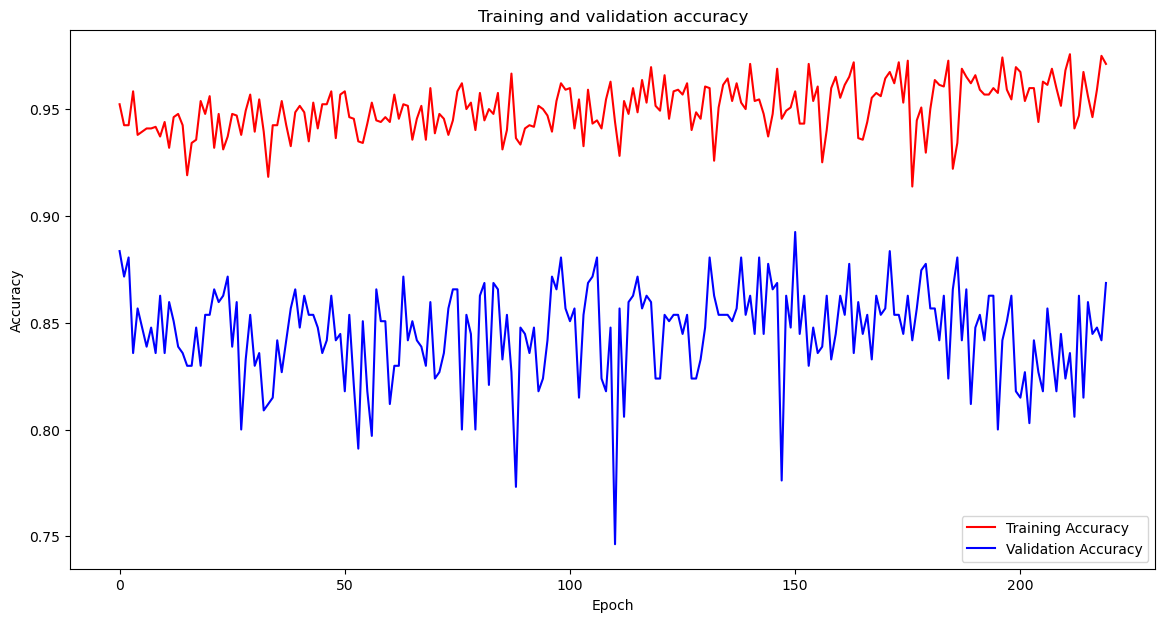

In [29]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Training and validation loss')

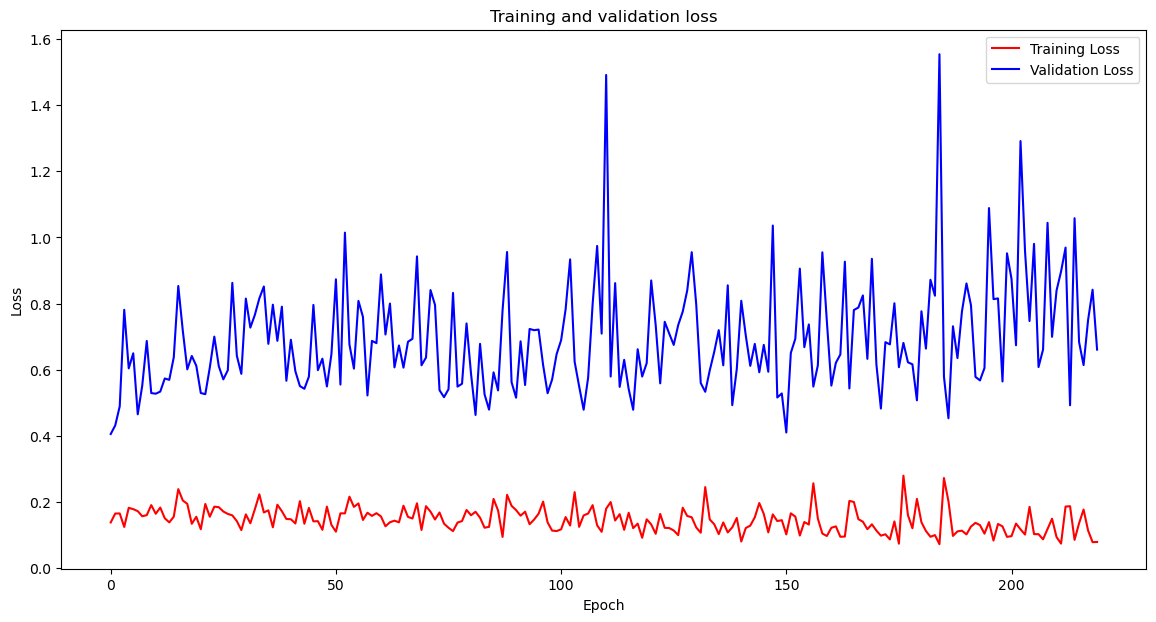

In [30]:
fig2 = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')

In [27]:
def preprocess_image(path):
    img = load_img(path, target_size = (img_height, img_width))
    a = img_to_array(img)
    a = np.expand_dims(a, axis = 0)
    a /= 255.
    return a

In [28]:
# Read Test Images Dir and their labels
test_images_dir = '../data/model/test/'
test_df = pd.read_csv('/content/dataset/test.csv')

# put them in a list
test_dfToList = test_df['Image_id'].tolist()
test_ids = [str(item) for item in test_dfToList]

test_images = [test_images_dir+item for item in test_ids]
test_preprocessed_images = np.vstack([preprocess_image(fn) for fn in test_images])
np.save('/content/test_preproc_CNN.npy', test_preprocessed_images)

NameError: name 'pd' is not defined

In [ ]:
array = model.predict(test_preprocessed_images, batch_size=1, verbose=1)
answer = np.argmax(array, axis=1)
print(answer)

In [ ]:
test_df = pd.read_csv('/content/dataset/test.csv')
y_true = test_df['labels']
y_pred = array
print(y_true)

In [ ]:
loss = log_loss(y_true, y_pred, eps=1e-15, normalize=True, sample_weight=None, labels=None)

In [ ]:
conf_mat = confusion_matrix(y_true, answer)
conf_mat

In [ ]:

train_dir = '/content/weather-data/train/'
classes = os.listdir(train_dir)
     

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = cm.round(2)
        #print("Normalized confusion matrix")
    else:
        cm=cm
        #print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
np.set_printoptions(precision=2)

fig1 = plt.figure(figsize=(7,6))
plot_confusion_matrix(conf_mat, classes=classes, title='Confusion matrix, without normalization')
plt.show()
     